#### Import Needed Package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

#### Load Dataset

In [3]:
df_train = pd.read_csv('./twitter_training.csv')
df_val = pd.read_csv('./twitter_validation.csv')

In [4]:
df_train

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
df_val

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

#### Dataset Overview and Initial Preprocessing

In [8]:
df_train = df_train.rename(columns={'2401': 'ID', 'Borderlands': 'platform', 'Positive': 'sentimen', 'im getting on borderlands and i will murder you all ,': 'text'})
df_val = df_val.rename(columns={'3364': 'ID', 'Facebook': 'platform', 'Irrelevant': 'sentimen', 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣': 'text'})

In [9]:
df_train

,ID,platform,sentimen,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [10]:
print(df_train["sentimen"].value_counts())
print()
print(df_val["sentimen"].value_counts())

sentimen
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

sentimen
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64


In [11]:
print("Platform Counts - Training")
print(df_train["platform"].value_counts())
print(20*"==")
print("Platform COunts - Validation")
print(df_val["platform"].value_counts())

Platform Counts - Training
platform
Microsoft                            2400
MaddenNFL                            2400
TomClancysRainbowSix                 2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Overwatch                            2334
Xbox(Xseries)                        2334
johnson&johnson                      2328
Amazon                               2316
HomeDepot                            2310
PlayStation5(PS5)                    2310
CS-GO                                2304
Cyberpunk2077                        230

In [12]:
# We're dropping unneeded columns

df_train = df_train.drop(["ID","platform"], axis=1)
df_val = df_val.drop(["ID","platform"], axis=1)

In [13]:
print(f"Rows: {df_train.shape[0]}, Columns: {df_train.shape[1]}")
print(f"Duplicates: {df_train.duplicated().sum()}") 
print(f"missing data: {sum(df_train.isna().sum())}")

print(20*"==")

print(f"Rows: {df_val.shape[0]}, Columns: {df_val.shape[1]}")
print(f"Duplicates: {df_val.duplicated().sum()}") 
print(f"missing data: {sum(df_val.isna().sum())}")

Rows: 74681, Columns: 2
Duplicates: 4909
missing data: 686
Rows: 999, Columns: 2
Duplicates: 1
missing data: 0


In [14]:
kolom1=len(df_train.columns)
for i in range (0, kolom1):
  df_train=df_train[df_train.iloc[:,i]!='?']
  df_train=df_train[df_train.iloc[:,i]!='']
  df_train=df_train[~df_train.iloc[:,i].isna()]
df_train.info()
df_train.drop_duplicates(keep= 'first',inplace = True)

kolom=len(df_val.columns)
for i in range (0, kolom):
  df_val=df_val[df_val.iloc[:,i]!='?']
  df_val=df_val[df_val.iloc[:,i]!='']
  df_val=df_val[~df_val.iloc[:,i].isna()]
df_val.info()
df_val.drop_duplicates(keep= 'first',inplace = True)

print(f"Rows: {df_train.shape[0]}, Columns: {df_train.shape[1]}")
print(f"Duplicates: {df_train.duplicated().sum()}") 
print(f"missing data: {sum(df_train.isna().sum())}")

print(20*"==")

print(f"Rows: {df_val.shape[0]}, Columns: {df_val.shape[1]}")
print(f"Duplicates: {df_val.duplicated().sum()}") 
print(f"missing data: {sum(df_val.isna().sum())}")


<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  73995 non-null  object
 1   text      73995 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  999 non-null    object
 1   text      999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB
Rows: 69768, Columns: 2
Duplicates: 0
missing data: 0
Rows: 998, Columns: 2
Duplicates: 0
missing data: 0


In [15]:
import re
import string
import emoji
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# Pastikan resource NLTK terunduh
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')           # kalau belum pernah diunduh
nltk.download('omw-1.4')           # opsional tapi sering diperlukan
nltk.download('punkt')             # untuk tokenisasi, jika kamu pakai word_tokenize()

# Inisialisasi
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Kamus singkatan umum (bisa diperluas)
abbreviation_map = {
    "u": "you",
    "ur": "your",
    "r": "are",
    "btw": "by the way",
    "idk": "i do not know",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "lol": "laughing out loud",
    "omg": "oh my god",
    "thx": "thanks",
    "pls": "please",
    "plz": "please",
    "dont": "do not",
    "cant": "cannot",
    "wont": "will not",
    "ive": "i have",
    "ill": "i will",
    "didnt": "did not",
    "doesnt": "does not",
    "isnt": "is not",
    "wasnt": "was not",
    "havent": "have not",
    "shouldnt": "should not",
    "couldnt": "could not",
    "wouldnt": "would not",
}

def get_wordnet_pos(word):
    """
    Helper function: 
    Mengubah POS tag (part-of-speech) menjadi format yang bisa dipakai lemmatizer.
    """
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)


def preprocess_text(text):
    """
    Function for text preprocessing for English sentiment analysis.
    Includes:
      - lowercase
      - emoji handling
      - URL and number removal
      - punctuation removal
      - short form expansion
      - stopword removal
      - lemmatization
    """

    # Ensure input is string
    if not isinstance(text, str):
        text = str(text)

    # Lowercase
    text = text.lower()

    # Replace emojis with text description
    text = emoji.demojize(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Expand common short forms
    words = text.split()
    expanded_words = [abbreviation_map.get(w, w) for w in words]
    text = ' '.join(expanded_words)

    # Tokenize and remove stopwords + lemmatize
    filtered_words = []
    for word in text.split():
        if word not in stop_words:
            pos = get_wordnet_pos(word)
            lemma = lemmatizer.lemmatize(word, pos)
            filtered_words.append(lemma)

    # Join cleaned text
    processed_text = ' '.join(filtered_words)

    # Clean extra whitespace
    processed_text = re.sub(r'\s+', ' ', processed_text).strip()

    return processed_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data.

#### Seperate cleaned text

In [16]:
df_train['clean_text'] = df_train['text'].apply(preprocess_text)
print(df_train[['text', 'clean_text']])

                                                    text  \
0      I am coming to the borders and I will kill you...   
1      im getting on borderlands and i will kill you ...   
2      im coming on borderlands and i will murder you...   
3      im getting on borderlands 2 and i will murder ...   
4      im getting into borderlands and i can murder y...   
...                                                  ...   
74676  Just realized that the Windows partition of my...   
74677  Just realized that my Mac window partition is ...   
74678  Just realized the windows partition of my Mac ...   
74679  Just realized between the windows partition of...   
74680  Just like the windows partition of my Mac is l...   

                                              clean_text  
0                                       come border kill  
1                                 im get borderland kill  
2                              im come borderland murder  
3                               im get bord

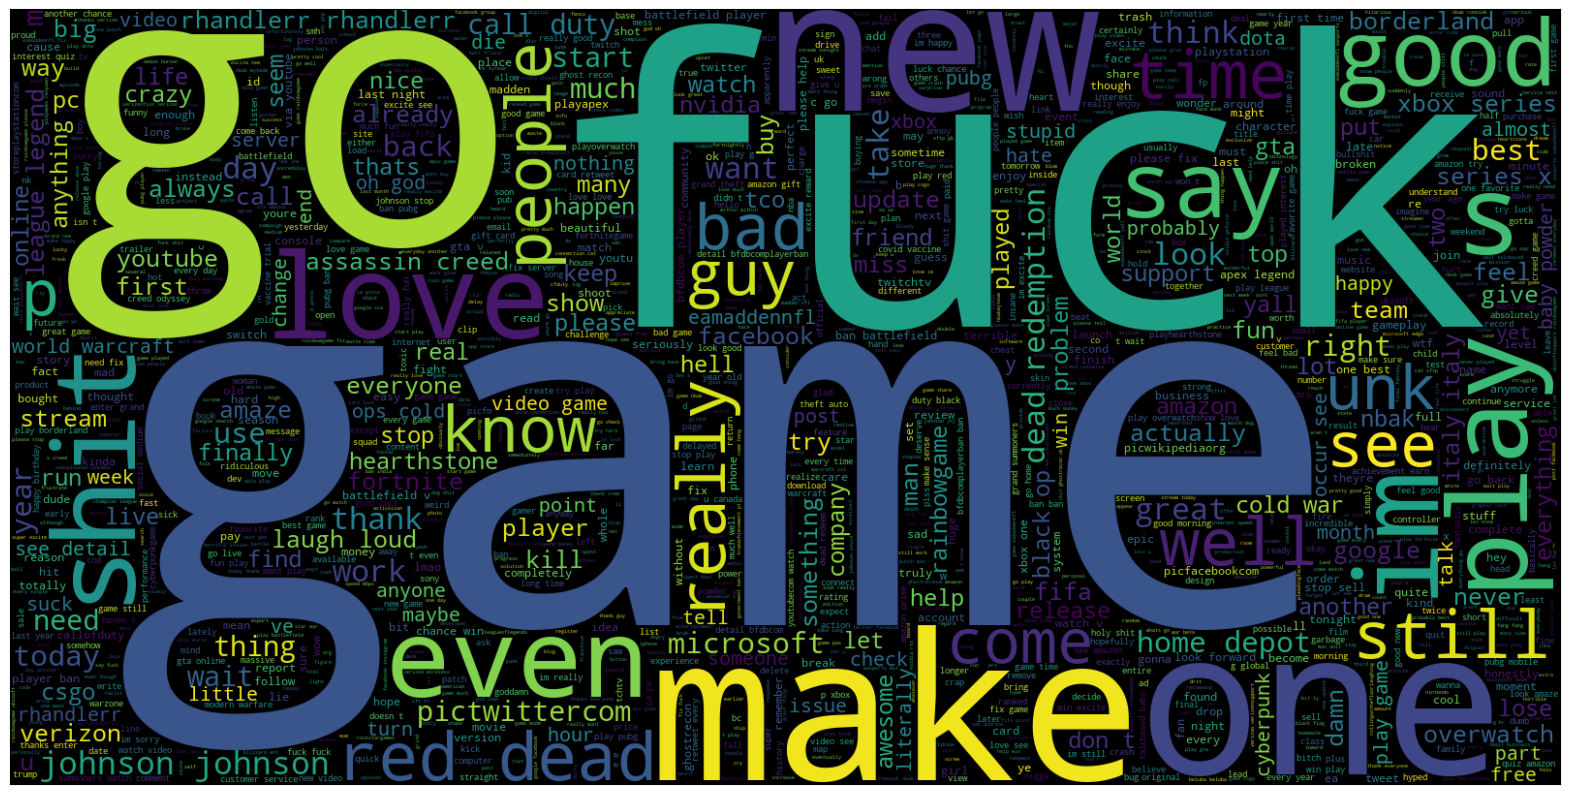

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(df_train['clean_text']))
plt.imshow(wc, interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.show()

In [18]:
df_val['clean_text'] = df_val['text'].apply(preprocess_text)
print(df_val[['text', 'clean_text']])

                                                  text  \
0    BBC News - Amazon boss Jeff Bezos rejects clai...   
1    @Microsoft Why do I pay for WORD when it funct...   
2    CSGO matchmaking is so full of closet hacking,...   
3    Now the President is slapping Americans in the...   
4    Hi @EAHelp I’ve had Madeleine McCann in my cel...   
..                                                 ...   
994  ⭐️ Toronto is the arts and culture capital of ...   
995  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...   
996  Today sucked so it’s time to drink wine n play...   
997  Bought a fraction of Microsoft today. Small wins.   
998  Johnson & Johnson to stop selling talc baby po...   

                                            clean_text  
0    bbc news amazon bos jeff bezos reject claim co...  
1    microsoft pay word function poorly samsungus c...  
2    csgo matchmaking full closet hack truly awful ...  
3    president slap american face really commit unl...  
4    hi eahelp i’v

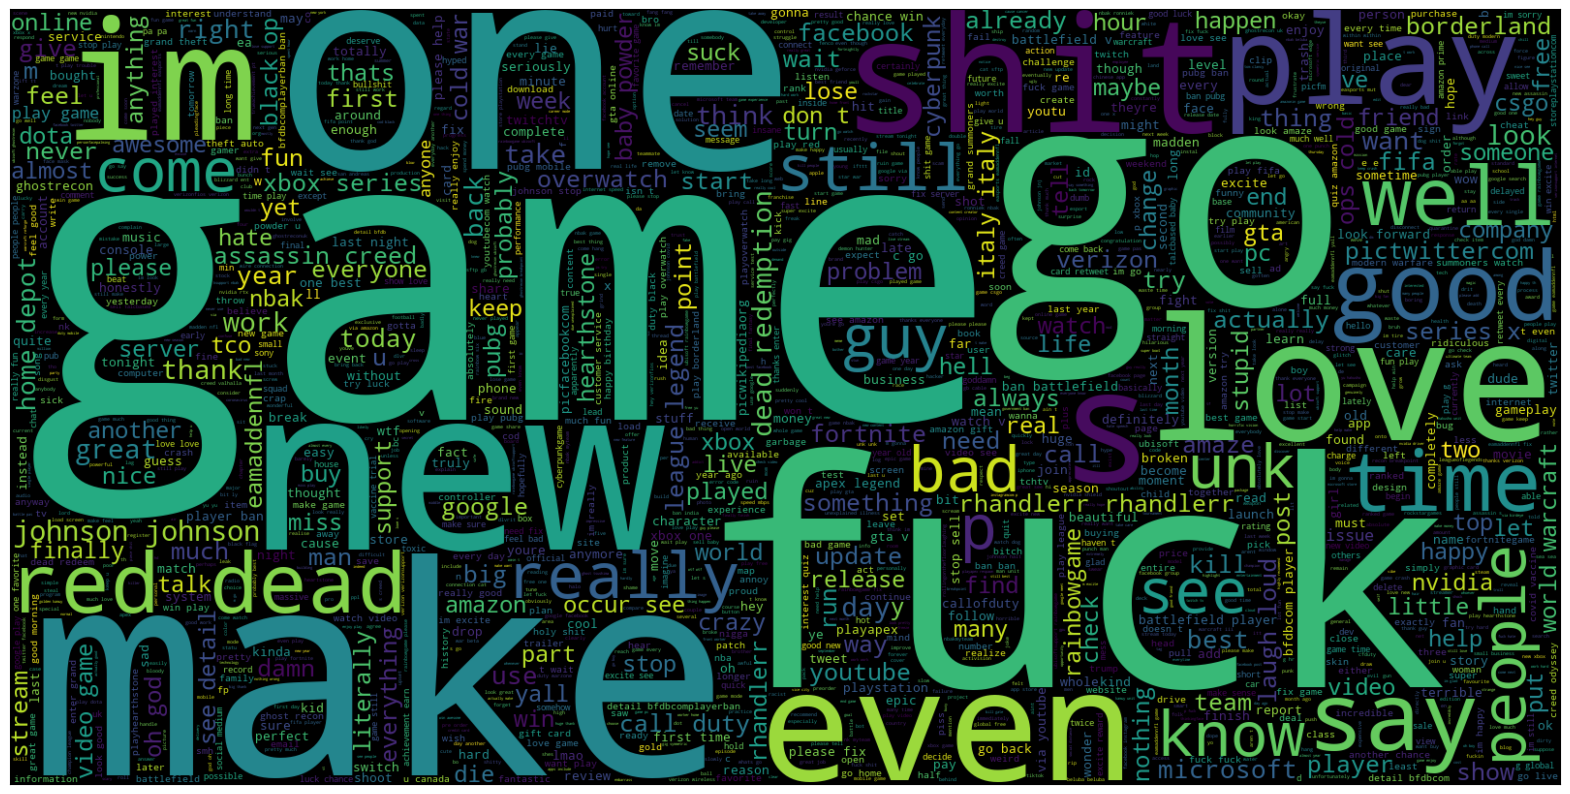

In [19]:
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(df_train['clean_text']))
plt.imshow(wc, interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.show()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define TF-IDF vectorizer (you can tune max_features, ngram_range etc. as needed)
tfidf = TfidfVectorizer(max_features=17000, ngram_range=(1,2))

In [21]:
# Fit TF-IDF on training text and transform train and test text
X_train = tfidf.fit_transform(df_train['clean_text'])
X_test = tfidf.transform(df_val['clean_text'])

# Assuming your sentiment labels are in 'label' column in both dfs
y_train = df_train['sentimen']
y_test = df_val['sentimen']

In [22]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, f1_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import inspect

def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluasi model klasifikasi multi-class:
      - ROC & AUC (macro)
      - Akurasi
      - F1-score (macro)
      - ROC Curve Plot
    Dapat digunakan untuk SVM, Random Forest, Logistic Regression, dll.
    """

    # Prediksi label
    y_pred = model.predict(X_test)

    # Coba ambil skor probabilitas atau decision function
    if hasattr(model, "decision_function"):
        decision_scores = model.decision_function(X_test)
    elif hasattr(model, "predict_proba"):
        decision_scores = model.predict_proba(X_test)
    else:
        raise ValueError(f"Model {model_name} tidak mendukung ROC (butuh decision_function atau predict_proba)")

    # Binarisasi label untuk ROC multi-class
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    # Hitung ROC curve dan AUC untuk tiap kelas
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], decision_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # AUC rata-rata (macro)
    roc_auc["macro"] = roc_auc_score(y_test_bin, decision_scores, average="macro", multi_class="ovr")

    # Akurasi dan F1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"======= Evaluasi Klasifikasi {model_name} =======")
    print(f"Akurasi Klasifikasi     : {accuracy * 100:.2f}%")
    print(f"F-measure (macro avg)   : {f1:.3f}")
    print(f"AUC rata-rata (macro)   : {roc_auc['macro']:.3f}")
    print("=" * 45)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    # Garis diagonal (baseline)
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Multi-Class {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return {
        "model": model_name,
        "accuracy": accuracy,
        "f1_macro": f1,
        "auc_macro": roc_auc["macro"]
    }

#### Logistic Regresion

In [23]:
# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Accuracy: 0.9008016032064128
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.90      0.87      0.89       171
    Negative       0.87      0.94      0.90       266
     Neutral       0.94      0.87      0.90       285
    Positive       0.90      0.91      0.90       276

    accuracy                           0.90       998
   macro avg       0.90      0.90      0.90       998
weighted avg       0.90      0.90      0.90       998



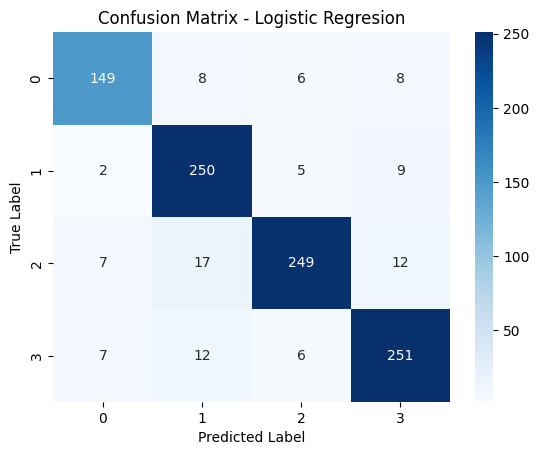

In [24]:
# Predict on test data
y_predlr = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_predlr))
print("Classification Report:\n", classification_report(y_test, y_predlr))

cm = confusion_matrix(y_test, y_predlr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regresion')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

======= Evaluasi Klasifikasi Logistic Regresion =======
Akurasi Klasifikasi     : 90.08%
F-measure (macro avg)   : 0.899
AUC rata-rata (macro)   : 0.972


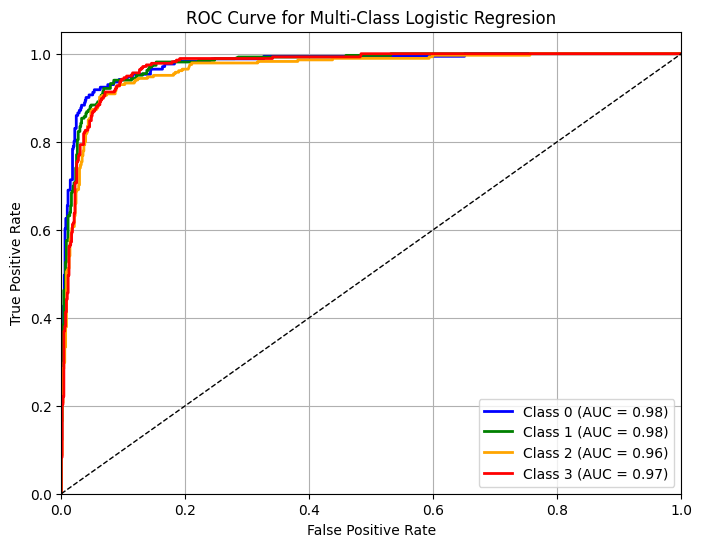

In [25]:
lr_results = evaluate_model(model, X_test, y_test, model_name="Logistic Regresion")

## Tugas

🌲 Training Random Forest Model...

Accuracy (Random Forest): 0.5050100200400801
Classification Report (Random Forest):
               precision    recall  f1-score   support

  Irrelevant       1.00      0.04      0.08       171
    Negative       0.40      0.95      0.56       266
     Neutral       0.90      0.26      0.40       285
    Positive       0.62      0.62      0.62       276

    accuracy                           0.51       998
   macro avg       0.73      0.47      0.42       998
weighted avg       0.71      0.51      0.45       998



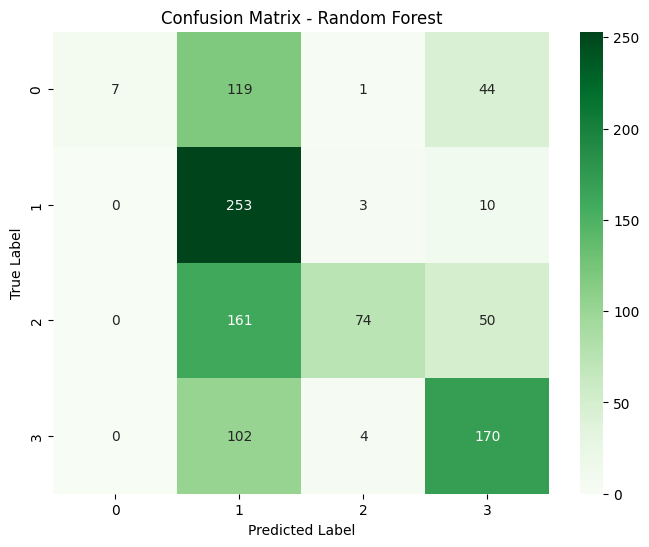

======= Evaluasi Klasifikasi Random Forest =======
Akurasi Klasifikasi     : 50.50%
F-measure (macro avg)   : 0.415
AUC rata-rata (macro)   : 0.878


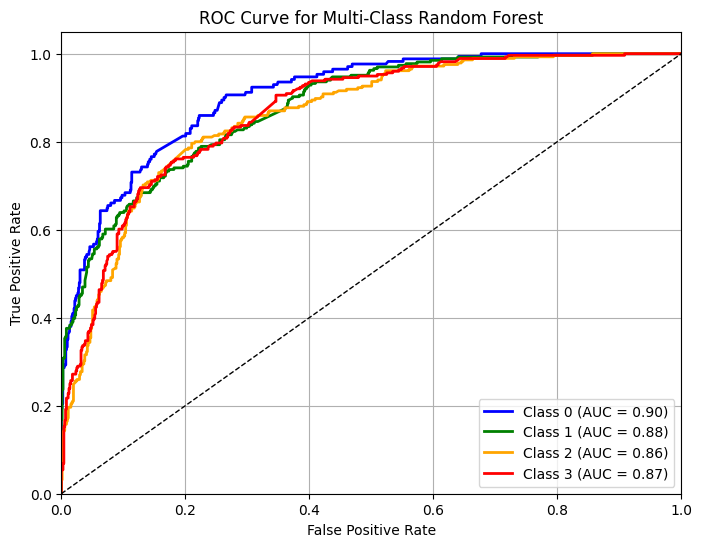

In [26]:
# Training Menggunakan Model Random Forest dan SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# ===== Random Forest =====
print("🌲 Training Random Forest Model...")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Prediksi dengan Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluasi Random Forest
print("\nAccuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluasi detail Random Forest dengan ROC
rf_results = evaluate_model(rf_model, X_test, y_test, model_name="Random Forest")



🤖 Training Support Vector Machine (SVM) Model...

Accuracy (SVM): 0.93687374749499
Classification Report (SVM):
               precision    recall  f1-score   support

  Irrelevant       0.94      0.93      0.93       171
    Negative       0.95      0.95      0.95       266
     Neutral       0.96      0.92      0.94       285
    Positive       0.90      0.95      0.93       276

    accuracy                           0.94       998
   macro avg       0.94      0.94      0.94       998
weighted avg       0.94      0.94      0.94       998



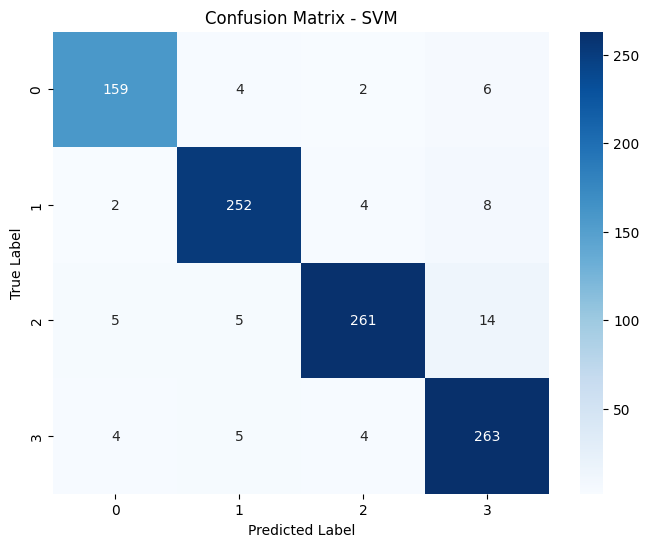

======= Evaluasi Klasifikasi Support Vector Machine =======
Akurasi Klasifikasi     : 93.69%
F-measure (macro avg)   : 0.937
AUC rata-rata (macro)   : 0.988


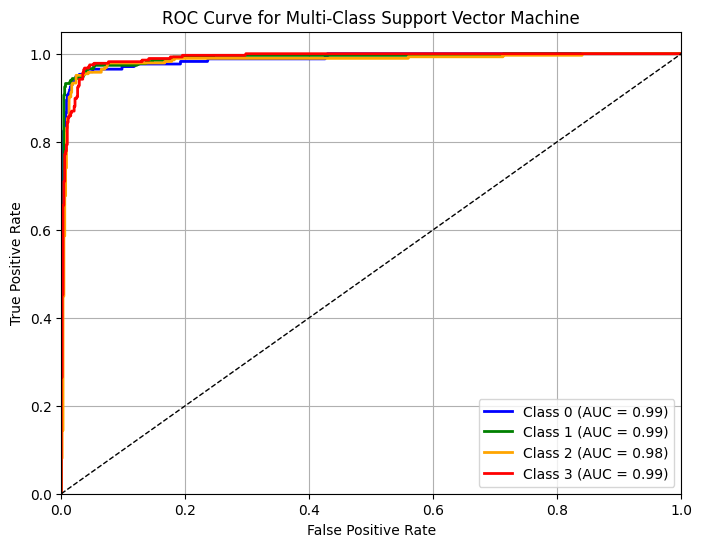

In [28]:
# ===== Support Vector Machine (SVM) =====
print("\n\n" + "="*50)
print("🤖 Training Support Vector Machine (SVM) Model...")
print("="*50)
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Prediksi dengan SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluasi SVM
print("\nAccuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluasi detail SVM dengan ROC
svm_results = evaluate_model(svm_model, X_test, y_test, model_name="Support Vector Machine")



📊 PERBANDINGAN HASIL SEMUA MODEL
                 model  accuracy  f1_macro  auc_macro
    Logistic Regresion  0.900802  0.899438   0.972270
         Random Forest  0.505010  0.415425   0.877729
Support Vector Machine  0.936874  0.936615   0.988434


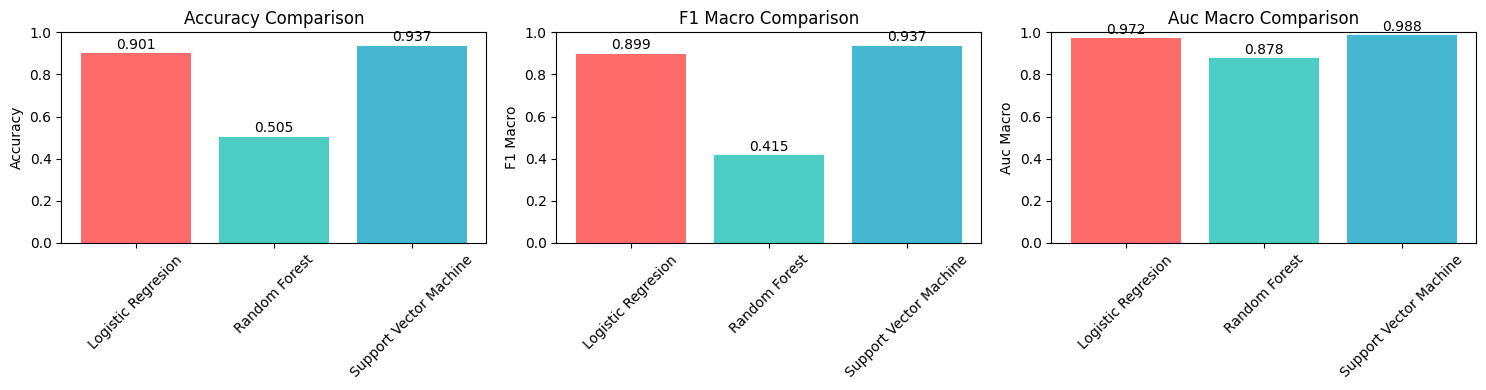


🏆 Model Terbaik: Support Vector Machine dengan Akurasi 93.69%


In [29]:
# ===== Perbandingan Semua Model =====
print("\n\n" + "="*60)
print("📊 PERBANDINGAN HASIL SEMUA MODEL")
print("="*60)

# Kumpulkan hasil
all_results = [lr_results, rf_results, svm_results]

# Buat dataframe untuk perbandingan
comparison_df = pd.DataFrame(all_results)
print(comparison_df.to_string(index=False))

# Visualisasi perbandingan
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

metrics = ['accuracy', 'f1_macro', 'auc_macro']
colors_model = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, metric in enumerate(metrics):
    axes[idx].bar(comparison_df['model'], comparison_df[metric], color=colors_model)
    axes[idx].set_ylabel(metric.replace('_', ' ').title())
    axes[idx].set_title(f'{metric.replace("_", " ").title()} Comparison')
    axes[idx].set_ylim([0, 1])
    axes[idx].tick_params(axis='x', rotation=45)
    for i, v in enumerate(comparison_df[metric]):
        axes[idx].text(i, v + 0.02, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

# Tentukan model terbaik
best_model_idx = comparison_df['accuracy'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'model']
best_accuracy = comparison_df.loc[best_model_idx, 'accuracy']

print(f"\n🏆 Model Terbaik: {best_model_name} dengan Akurasi {best_accuracy*100:.2f}%")